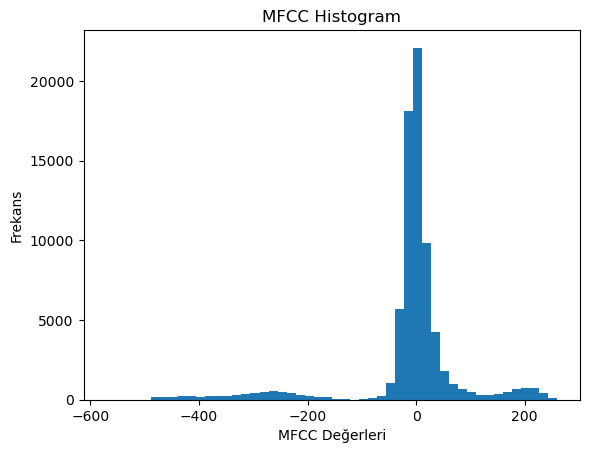

Doğruluk (ACC): 0.4964502164502165
F1 Skoru (FM): 0.6578823529411765


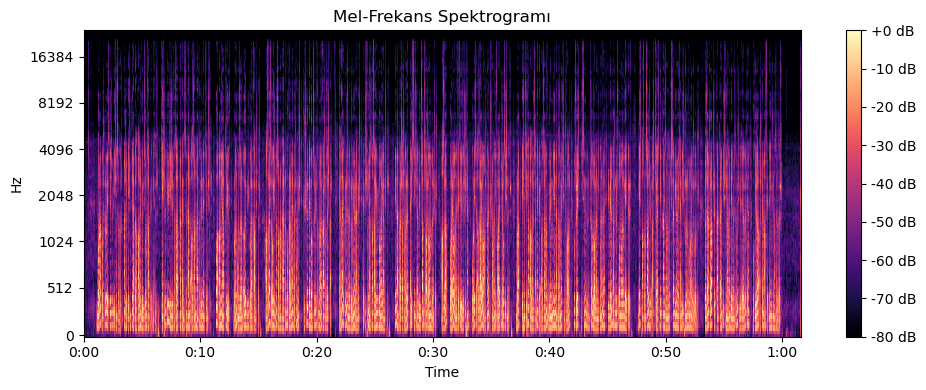

Metin: Bora başarılı ve etkileyici bir iş insanıdır ancak geçmişte yaptığı hataların gölgesi onu takip etmektedir gençliğindeki bir gecelik hata hem kendisinin hem de Azra'nın hayatını derinden etkilemiştir bu hatanın yarattığı yük Bora'nın omuzlarında ağır bir yük olarak kalmıştır Azra ise o geceden sonra hayatını toparlamaya başarmış güçlü ve bağımsız bir kadın olarak karşımıza çıkar Kendi Ayakları üzerinde durmayı öğrenmiş ve iş dünyasına Saygın bir konuma gelmiştir yeniden karşılaşmaları her ikisi için de duygusal bir savaş alanına dönüşür Azra Bora'ya olan nefreti ile yüzleşir Azrail pişmanlığını ifade etme çabası içindedir Bora geçmişteki hatalarını düzeltmek ve Azra'nın Güvenini yeniden kazanmak için Çabalar bu süreç ikisinin de duygusal duvarlarına yıkıldığını ve birbirlerine karşı dürüst olmalarını gerektirir genç patron sadece bir aşk hikayesi değil aynı zamanda kişisel büyüme ve kendi iş huzurunu bulma yolculuğudur Özlem çorapçı karakterlerinin iç dünyalarını derinlemesine b

In [5]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import speech_recognition as sr
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import librosa.display

# Ses dosyasının yolunu doğru olarak belirtin
file_path = "tahakocer.wav"

try:
    # Ses dosyasını yükle
    y, sr_value = librosa.load(file_path, sr=None, res_type='kaiser_best')
except FileNotFoundError:
    print("Belirtilen dosya bulunamadı. Dosya yolunun doğru olduğundan emin olun.")
except Exception as e:
    print(f"Dosya yüklenirken bir hata oluştu: {e}")
else:
    # Histogram oluştur
    mfccs = librosa.feature.mfcc(y=y, sr=sr_value, n_mfcc=13)
    plt.hist(mfccs.flatten(), bins=50)
    plt.title('MFCC Histogram')
    plt.xlabel('MFCC Değerleri')
    plt.ylabel('Frekans')
    plt.show()

    # Tek kişinin tanımlanması için model eğitimi
    X_train = np.random.rand(100, 13)  # Örnek eğitim verisi
    y_train = np.random.randint(0, 2, 100)  # Örnek eğitim etiketleri
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    model = SVC(kernel='linear')
    model.fit(X_train_scaled, y_train)

    # Test verisini ölçeklendir ve tahmin et
    X_test = mfccs.T  # Transpoz alarak her sütunu bir örnek yap
    X_test_scaled = scaler.transform(X_test)
    predictions = model.predict(X_test_scaled)

    # ACC ve FM hesapla
    y_test = np.random.randint(0, 2, X_test.shape[0])  # Gerçek etiketler
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print("Doğruluk (ACC):", acc)
    print("F1 Skoru (FM):", f1)

    # Mel-frekans spektrogramını çiz
    stft = np.abs(librosa.stft(y))
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_value)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr_value, x_axis='time', y_axis='mel')
    plt.title('Mel-Frekans Spektrogramı')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

    # Konuşmayı metne dönüştür
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data, language='tr-TR')
        print("Metin:", text)

    # Kelime sayma
    word_count = len(text.split())
    print("Kelime Sayısı:", word_count)


# Mikrofondan anlık konuşmayı tanımlama
def recognize_from_microphone():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Konuşmanızı bekliyorum...")
        audio_data = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio_data, language='tr-TR')
            print("Mikrofon Metin:", text)

            # Anlık ses verisini işle
            y, sr_value = librosa.load(file_path, sr=None)
            mfccs = librosa.feature.mfcc(y=y, sr=sr_value, n_mfcc=13)
            X_test = mfccs.T
            X_test_scaled = scaler.transform(X_test)
            predictions = model.predict(X_test_scaled)
            print("Tahminler:", predictions)

            # Kelime sayma
            word_count = len(text.split())
            print("Kelime Sayısı:", word_count)
        except sr.UnknownValueError:
            print("Google Web Speech herhangi bir şey anlamadı")
        except sr.RequestError as e:
            print(f"Google Web Speech hizmetinden sonuç alınamadı; {e}")


# Anlık konuşmayı tanımla
recognize_from_microphone()